In [1]:
import neptune.new as neptune
import os
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader, random_split
from torch.optim.lr_scheduler import CyclicLR
import torch.multiprocessing as mp
import numpy as np
import random

import sys
sys.path.append("..") # adds higher directory to python modules path

from LoaderPACK.Unet import Unet
from LoaderPACK.Loader import load_whole_data, load_5_min_intervals, load_shuffle_5_min
from LoaderPACK.Accuarcy_finder import Accuarcy_find_tester
from multiprocessing import Process
from LoaderPACK.trainer import net_train


import matplotlib.pyplot as plt
import csv



In [2]:
import matplotlib
matplotlib.use('Agg')
load_file = load_whole_data(path = "C:/Users/Marc/Desktop/model_data",
                                  ind = range(1, 226 + 1))

file_loader = torch.utils.data.DataLoader(load_file,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

f_nr = 1
tot_sr_nr = 1
for file in file_loader:
    print(f_nr)
    sr_nr = 1
    for i in range(file[0].shape[1]):
        figure, axis = plt.subplots(2, 1)
        axis[0].plot(file[0][0][i])
        axis[0].set_title(f"file_nr: {f_nr} with channel: {sr_nr}")
        axis[1].plot(file[1][0][i], "b")
        
        plt.savefig(f"C:/Users/Marc/Desktop/plots/graf ({tot_sr_nr}).jpg")
        plt.close()
        tot_sr_nr += 1
        sr_nr += 1
    f_nr += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


KeyboardInterrupt: 

False


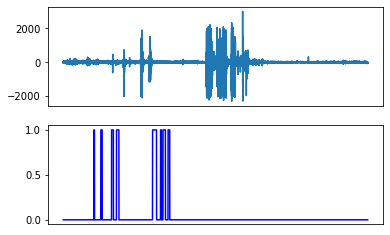

In [9]:
load_file = load_whole_data(path = "C:/Users/Marc/Desktop/model_data",
                                  ind = range(3, 226 + 1))

file_loader = torch.utils.data.DataLoader(load_file,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

for file in file_loader:
    figure, axis = plt.subplots(2, 1)

    # The artifacts on channel: FP1-F7
    axis[0].plot(file[0][0][0])
    axis[0].axes.xaxis.set_visible(False) # remove digits on x-axis
    
    # The artifacts on channel: F7-T3
    axis[1].plot(file[1][0][0], "b")
    axis[1].axes.xaxis.set_visible(False) # remove digits on x-axis
    
    ls = []
    
    for i in range(1, 4):
    
        ls.append(all(file[1][0][0] == file[1][0][i]))
    
    print(all(ls))
    plt.show()
    break

In [ ]:
load_file = load_whole_data(path = "C:/Users/Marc/Desktop/model_data",
                                  ind = range(1, 226 + 1))

file_loader = torch.utils.data.DataLoader(load_file,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

i = 1
for file in file_loader:
    print(i)
    figure, axis = plt.subplots(2, 1)

    # The artifacts on channel: FP1-F7
    axis[0].plot(file[0][0][0])
    axis[0].axes.xaxis.set_visible(False) # remove digits on x-axis
    
    # The artifacts on channel: F7-T3
    axis[1].plot(file[1][0][0], "b")
    axis[1].axes.xaxis.set_visible(False) # remove digits on x-axis
    
    plt.show()
    
    i += 1

    #input("ind:")

    #for i in range(file[0].shape[1]):
    #    figure, axis = plt.subplots(2, 1)
    #    # The artifacts on channel: FP1-F7
    #    axis[0].plot(file[0][0][0])
    #    axis[0].axes.xaxis.set_visible(False) # remove digits on x-axis
    #    # The artifacts on channel: F7-T3
    #    axis[1].plot(file[1][0][0], "b")
    #    axis[1].axes.xaxis.set_visible(False) # remove digits on x-axis
    #    
    #    plt.show()
    #    
    #    input("ind:")

In [ ]:
for file in file_loader:
    if False:
        figure, axis = plt.subplots(8, 1)

        # The artifacts on channel: FP1-F7
        axis[0].plot(file[0][0][0])
        axis[0].axes.xaxis.set_visible(False) # remove digits on x-axis

        # The artifacts on channel: F7-T3
        axis[1].plot(file[1][0][0], "b")
        axis[1].axes.xaxis.set_visible(False) # remove digits on x-axis

        axis[2].plot(file[0][0][1])
        axis[2].axes.xaxis.set_visible(False) # remove digits on x-axis

        # The artifacts on channel: F7-T3
        axis[3].plot(file[1][0][1], "b")
        axis[3].axes.xaxis.set_visible(False) # remove digits on x-axis


        axis[4].plot(file[0][0][2])
        axis[4].axes.xaxis.set_visible(False) # remove digits on x-axis

        # The artifacts on channel: F7-T3
        axis[5].plot(file[1][0][2], "b")
        axis[5].axes.xaxis.set_visible(False) # remove digits on x-axis

        axis[6].plot(file[0][0][3])
        axis[6].axes.xaxis.set_visible(False) # remove digits on x-axis

        # The artifacts on channel: F7-T3
        axis[7].plot(file[1][0][3], "b")
        axis[7].axes.xaxis.set_visible(False) # remove digits on x-axis

        plt.show()